In [2]:
using Distributions, LinearAlgebra, Random, Measures, Plots; gr()

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

12-element Array{Float64,1}:
 158.0
 164.2
 160.3
 159.9
 162.1
 164.6
 169.6
 167.4
 166.4
 171.0
 171.2
 172.6

In [3]:
using Printf

time_step = 1.0  # day
scale_factor = 4.0/10

function g_h_filter(data, x0, dx, g, h, dt)
    estimates, predictions = [], []

    x_est = x0
    for z in data
        # prediction step
        x_pred = x_est + dx*dt
        push!(predictions, x_pred)
        dx = dx
        
        # update step
        residual = z - x_pred
        dx = dx + h*residual/dt
        x_est = x_pred + g*residual
        push!(estimates, x_est)

        @printf("%f, %f, %f, %f\n", x_est, x_pred, z, dx)
    end
    return estimates, predictions
end

g_h_filter (generic function with 1 method)

In [4]:
e, p = g_h_filter(weights, 160, 1, 6/10, 2/3, 1)

159.200000, 161.000000, 158.000000, -1.000000
161.800000, 158.200000, 164.200000, 3.000000
162.100000, 164.800000, 160.300000, 0.000000
160.780000, 162.100000, 159.900000, -1.466667
160.985333, 159.313333, 162.100000, 0.391111
163.310578, 161.376444, 164.600000, 2.540148
168.100290, 165.850726, 169.600000, 5.039664
169.695982, 173.139955, 167.400000, 1.213028
168.203604, 170.909010, 166.400000, -1.792979
169.164250, 166.410625, 171.000000, 1.266605
170.892342, 170.430855, 171.200000, 1.779368
172.628684, 172.671710, 172.600000, 1.731561


(Any[159.2, 161.79999999999998, 162.1, 160.78, 160.98533333333333, 163.31057777777778, 168.10029037037037, 169.6959818271605, 168.20360385843622, 169.16425009865569, 170.89234186230635, 172.6286839928957], Any[161, 158.2, 164.79999999999998, 162.10000000000002, 159.31333333333333, 161.37644444444445, 165.85072592592593, 173.13995456790124, 170.90900964609054, 166.41062524663923, 170.43085465576587, 172.6717099822393])

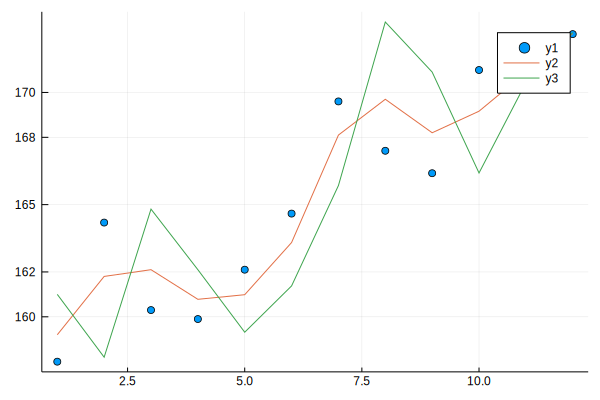

In [5]:
plot(weights, seriestype = :scatter)
plot!(e)
plot!(p)